## Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import string

## Read file

In [2]:
# Change directory accordingly to where the finaldataset.xlsx is located
data_dir = r'C:\Users\14000\Downloads\FYP Shahril (IRB-2022-538)\Data analysis'
# Read data
data_file = os.path.join(data_dir, 'finaldataset.xlsx')
powerclean = pd.read_excel(data_file, sheet_name='PowerClean', usecols="A:S", skiprows=0, nrows=127)  
snatch = pd.read_excel(data_file, sheet_name='Snatch', usecols="A:S", skiprows=0, nrows=127)

## Filter dataframe

In [3]:
# Function to filter data into respective days
def filter_dataframe(maindf, flex_col, vicon_col):
    data = pd.DataFrame()
    data['Participant'] = maindf['Participant']
    data['RM'] = maindf['1RM'] 
    data['Repetition'] = maindf['Repetition Number']
    data['FLEX'] = maindf[flex_col]
    data['VICON'] = maindf[vicon_col]
    return data

### Power Clean

In [4]:
# Power Clean
# Mean velocity  
powerclean_mean_left_D1 = filter_dataframe(powerclean, 'FLEX_Mean_Concentric_Left_D1', 'VICON_Mean_Concentric_Left_D1')
powerclean_mean_right_D1 = filter_dataframe(powerclean, 'FLEX_Mean_Concentric_Right_D1', 'VICON_Mean_Concentric_Right_D1')
powerclean_mean_left_D2 = filter_dataframe(powerclean, 'FLEX_Mean_Concentric_Left_D2', 'VICON_Mean_Concentric_Left_D2')
powerclean_mean_right_D2 = filter_dataframe(powerclean, 'FLEX_Mean_Concentric_Right_D2', 'VICON_Mean_Concentric_Right_D2')

# Peak velocity
powerclean_peak_left_D1 = filter_dataframe(powerclean, 'FLEX_Peak_Concentric_Left_D1', 'VICON_Peak_Concentric_Left_D1')
powerclean_peak_right_D1 = filter_dataframe(powerclean, 'FLEX_Peak_Concentric_Right_D1', 'VICON_Peak_Concentric_Right_D1')  
powerclean_peak_left_D2 = filter_dataframe(powerclean, 'FLEX_Peak_Concentric_Left_D2', 'VICON_Peak_Concentric_Left_D2')
powerclean_peak_right_D2 = filter_dataframe(powerclean, 'FLEX_Peak_Concentric_Right_D2', 'VICON_Peak_Concentric_Right_D2')

### Snatch

In [5]:
# Snatch
# Mean velocity
snatch_mean_left_D1 = filter_dataframe(snatch, 'FLEX_Mean_Concentric_Left_D1', 'VICON_Mean_Concentric_Left_D1')
snatch_mean_right_D1 = filter_dataframe(snatch, 'FLEX_Mean_Concentric_Right_D1', 'VICON_Mean_Concentric_Right_D1')
snatch_mean_left_D2 = filter_dataframe(snatch, 'FLEX_Mean_Concentric_Left_D2', 'VICON_Mean_Concentric_Left_D2')  
snatch_mean_right_D2 = filter_dataframe(snatch, 'FLEX_Mean_Concentric_Right_D2', 'VICON_Mean_Concentric_Right_D2')

# Peak velocity
snatch_peak_left_D1 = filter_dataframe(snatch, 'FLEX_Peak_Concentric_Left_D1', 'VICON_Peak_Concentric_Left_D1')
snatch_peak_right_D1 = filter_dataframe(snatch, 'FLEX_Peak_Concentric_Right_D1', 'VICON_Peak_Concentric_Right_D1')
snatch_peak_left_D2 = filter_dataframe(snatch, 'FLEX_Peak_Concentric_Left_D2', 'VICON_Peak_Concentric_Left_D2')  
snatch_peak_right_D2 = filter_dataframe(snatch, 'FLEX_Peak_Concentric_Right_D2', 'VICON_Peak_Concentric_Right_D2')

## Calculate dataframe

In [6]:
# Function to calculate the average and differences between VICON and FLEX for Bland-Altman analysis
def calculate_dataframe(left, right, left2, right2):
    data = pd.concat([left, right, left2, right2], ignore_index=True)
    data.dropna(inplace=True)
    data['average'] = (data['FLEX'] + data['VICON']) / 2
    data['differences'] = data['FLEX'] - data['VICON']
    return data

### Power Clean

In [7]:
# Power clean  
# Mean concentric velocity
powerclean_mean_data = calculate_dataframe(powerclean_mean_left_D1, powerclean_mean_right_D1, 
                                           powerclean_mean_left_D2, powerclean_mean_right_D2)

# Filter by RM  
powerclean_mean_data_20 = powerclean_mean_data[powerclean_mean_data['RM'] == 20]
powerclean_mean_data_40 = powerclean_mean_data[powerclean_mean_data['RM'] == 40] 
powerclean_mean_data_60 = powerclean_mean_data[powerclean_mean_data['RM'] == 60]
powerclean_mean_data_70 = powerclean_mean_data[powerclean_mean_data['RM'] == 70]
powerclean_mean_data_80 = powerclean_mean_data[powerclean_mean_data['RM'] == 80]
powerclean_mean_data_90 = powerclean_mean_data[powerclean_mean_data['RM'] == 90]
  
# Peak concentric velocity
powerclean_peak_data = calculate_dataframe(powerclean_peak_left_D1, powerclean_peak_right_D1, 
                                           powerclean_peak_left_D2, powerclean_peak_right_D2)
  
# Filter by RM
powerclean_peak_data_20 = powerclean_peak_data[powerclean_peak_data['RM'] == 20]  
powerclean_peak_data_40 = powerclean_peak_data[powerclean_peak_data['RM'] == 40]
powerclean_peak_data_60 = powerclean_peak_data[powerclean_peak_data['RM'] == 60] 
powerclean_peak_data_70 = powerclean_peak_data[powerclean_peak_data['RM'] == 70]
powerclean_peak_data_80 = powerclean_peak_data[powerclean_peak_data['RM'] == 80]
powerclean_peak_data_90 = powerclean_peak_data[powerclean_peak_data['RM'] == 90]
   

### Snatch

In [8]:
# Snatch
# Mean concentric velocity
snatch_mean_data = calculate_dataframe(snatch_mean_left_D1, snatch_mean_right_D1,
                                       snatch_mean_left_D2, snatch_mean_right_D2)
  
# Filter by RM
snatch_mean_data_20 = snatch_mean_data[snatch_mean_data['RM'] == 20] 
snatch_mean_data_40 = snatch_mean_data[snatch_mean_data['RM'] == 40]
snatch_mean_data_60 = snatch_mean_data[snatch_mean_data['RM'] == 60]
snatch_mean_data_70 = snatch_mean_data[snatch_mean_data['RM'] == 70]  
snatch_mean_data_80 = snatch_mean_data[snatch_mean_data['RM'] == 80]
snatch_mean_data_90 = snatch_mean_data[snatch_mean_data['RM'] == 90]
  
# Peak concentric velocity
snatch_peak_data = calculate_dataframe(snatch_peak_left_D1, snatch_peak_right_D1, 
                                       snatch_peak_left_D2, snatch_peak_right_D2)
   
# Filter by RM  
snatch_peak_data_20 = snatch_peak_data[snatch_peak_data['RM'] == 20]
snatch_peak_data_40 = snatch_peak_data[snatch_peak_data['RM'] == 40] 
snatch_peak_data_60 = snatch_peak_data[snatch_peak_data['RM'] == 60]
snatch_peak_data_70 = snatch_peak_data[snatch_peak_data['RM'] == 70]
snatch_peak_data_80 = snatch_peak_data[snatch_peak_data['RM'] == 80] 
snatch_peak_data_90 = snatch_peak_data[snatch_peak_data['RM'] == 90]

In [9]:
# Store dataframes in lists
powerclean_mean_data_df = [powerclean_mean_data_20, powerclean_mean_data_40, powerclean_mean_data_60, 
                           powerclean_mean_data_70, powerclean_mean_data_80, powerclean_mean_data_90,
                           powerclean_mean_data]

powerclean_peak_data_df = [powerclean_peak_data_20, powerclean_peak_data_40, powerclean_peak_data_60,
                           powerclean_peak_data_70, powerclean_peak_data_80, powerclean_peak_data_90, 
                           powerclean_peak_data]
                           
snatch_mean_data_df = [snatch_mean_data_20, snatch_mean_data_40, snatch_mean_data_60,
                       snatch_mean_data_70, snatch_mean_data_80, snatch_mean_data_90, 
                       snatch_mean_data]
                       
snatch_peak_data_df = [snatch_peak_data_20, snatch_peak_data_40, snatch_peak_data_60,
                       snatch_peak_data_70, snatch_peak_data_80, snatch_peak_data_90,
                       snatch_peak_data]

In [10]:
# Function to round up and down. (inbuilt function doesn't seem to work satisfactorily)
def round_up(n, decimals=0):
    multiplier = 10**decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10**decimals
    return math.floor(n * multiplier) / multiplier

## Create multiple bland-altman plots in a single figure

In [20]:
# Create name for subplot title later on
subplot_name = ['20%','40%', '60%', '70%', '80%', '90%', 'Overall']

# Bland-Altman functions
def create_blandAltman_plot(dataframes):
    fig = plt.figure(figsize=(10, 18))

    # Use gridspec to specify the layout
    gs = gridspec.GridSpec(4, 4)

    # Create x and y values to have a standardized axis for all subplots based on the overall data
    ymin_value = round_down(round(min(dataframes[-1]['differences']),2),1)
    ymax_value = round_up(round(max(dataframes[-1]['differences']),2),1)
    xmin_value = round_down(round(min(dataframes[-1]['average']),2),1)
    xmax_value = round_up(round(max(dataframes[-1]['average']),2),1)

    # ax.text(max(dataframes[index]['average']), upperLoA, '+1.96 SD: ' + str(round(upperLoA, 2)), verticalalignment='bottom', horizontalalignment='right', color='r')
    # ax.text(max(dataframes[index]['average']), mean_diff, 'Mean: ' + str(round(mean_diff, 2)), verticalalignment='bottom', horizontalalignment='right', color='r')
    # ax.text(max(dataframes[index]['average']), lowerLoA, '-1.96 SD: ' + str(round(lowerLoA, 2)), verticalalignment='bottom', horizontalalignment='right', color='r')    
    
    # Create list of alphabets for 'for loop' later on
    labels = list(string.ascii_uppercase)[:len(snatch_peak_data_df)]  # Generate labels A, B, C, ...

    for row in range(4):
        for col in range(2):
            # ax = plt.subplot(gs[row, col])

            if row == 0 and col == 0:
                ax = plt.subplot(gs[row, 0:2])
            elif row == 0 and col == 1:
                ax = plt.subplot(gs[row, 2:])
            elif row == 1 and col == 0:
                ax = plt.subplot(gs[row, 0:2])
            elif row == 1 and col == 1:
                ax = plt.subplot(gs[row, 2:])
            elif row == 2 and col == 0:
                ax = plt.subplot(gs[row, 0:2])
            elif row == 2 and col == 1:
                ax = plt.subplot(gs[row, 2:])
            elif row == 3 and col == 0:
                ax = plt.subplot(gs[row, 1:3])

            index = row * 2 + col
            if index < len(dataframes):
                mean_diff = np.mean(dataframes[index]['differences'])
                sd = np.std(dataframes[index]['differences'])
                upperLoA = mean_diff + 1.96 * sd
                lowerLoA = mean_diff - 1.96 * sd

                # Append data to list
                bias_list.append(mean_diff)
                lower_bound_list.append(lowerLoA)
                upper_bound_list.append(upperLoA)

                ax.scatter(dataframes[index]['average'], dataframes[index]['differences'], marker='.', c='blue')

                ax.axhline(y=mean_diff, color='r')
                ax.axhline(y=upperLoA, linestyle='--', color='r')
                ax.axhline(y=lowerLoA, linestyle='--', color='r')

                ax.text(max(dataframes[-1]['average']), upperLoA, '+1.96 SD: ' + str(round(upperLoA, 2)), verticalalignment='bottom', horizontalalignment='right', color='r', fontname='Arial', fontsize=15)
                ax.text(max(dataframes[-1]['average']), mean_diff, 'Mean: ' + str(round(mean_diff, 2)), verticalalignment='bottom', horizontalalignment='right', color='r',fontname='Arial', fontsize=15)
                ax.text(max(dataframes[-1]['average']), lowerLoA, '-1.96 SD: ' + str(round(lowerLoA, 2)), verticalalignment='bottom', horizontalalignment='right', color='r',fontname='Arial', fontsize=15)

                # if abs(upperLoA - max(dataframes[index]['differences'])) == 0.1:
                #     ax.set_ylim(ymax=max(max(dataframes[index]['differences']), upperLoA) + 0.1)
                # if abs(lowerLoA - min(dataframes[index]['differences'])) == 0.1:
                #     ax.set_ylim(ymin=min(min(dataframes[index]['differences']), lowerLoA) - 0.1)

                ax.set_ylim(ymin=ymin_value, ymax=ymax_value)
                ax.set_xlim(xmin=xmin_value, xmax=xmax_value)

                ax.set_xlabel('Mean Velocity (m/s)', fontname='Arial', fontsize=15)
                ax.set_ylabel('Difference (m/s)', fontname='Arial', fontsize=15)
                ax.set_title(f'{subplot_name[index]} 1RM', fontname='Arial', fontsize=18)
                
                ax.text(-0.1, 1.1, labels[index], transform=ax.transAxes, size=18, weight='bold')

    plt.tight_layout()

    return fig

# Function to create dataframe of bland-altman data
def put_in_df(condition_name):
    d = {'Percentage RM': subplot_name, 'Bias': bias_list, 'Lower bound': lower_bound_list, 'Upper bound': upper_bound_list} # Store list into dictionary
    df = pd.DataFrame(d)
    df["95% LoA"] = df["Lower bound"].round(2).astype(str) + " - " + df["Upper bound"].round(2).astype(str)
    df["Bias (95% LoA)"] = df["Bias"].round(2).astype(str) + " (" + df["95% LoA"] + ")"
    df["Condition"] = f"{condition_name}"
    return df

### Power clean - Mean concentric velocity

,Percentage RM,Bias,Lower bound,Upper bound,95% LoA,Bias (95% LoA),Condition
0,20%,0.035410,-0.133658,0.204478,-0.13 - 0.2,0.04 (-0.13 - 0.2),Power Clean MCV
1,40%,0.023625,-0.150518,0.197768,-0.15 - 0.2,0.02 (-0.15 - 0.2),Power Clean MCV
2,60%,0.018688,-0.137890,0.175267,-0.14 - 0.18,0.02 (-0.14 - 0.18),Power Clean MCV
3,70%,0.028642,-0.085407,0.142691,-0.09 - 0.14,0.03 (-0.09 - 0.14),Power Clean MCV
4,80%,0.031637,-0.069750,0.133024,-0.07 - 0.13,0.03 (-0.07 - 0.13),Power Clean MCV
5,90%,0.038810,-0.045906,0.123525,-0.05 - 0.12,0.04 (-0.05 - 0.12),Power Clean MCV
6,Overall,0.027673,-0.119505,0.174851,-0.12 - 0.17,0.03 (-0.12 - 0.17),Power Clean MCV


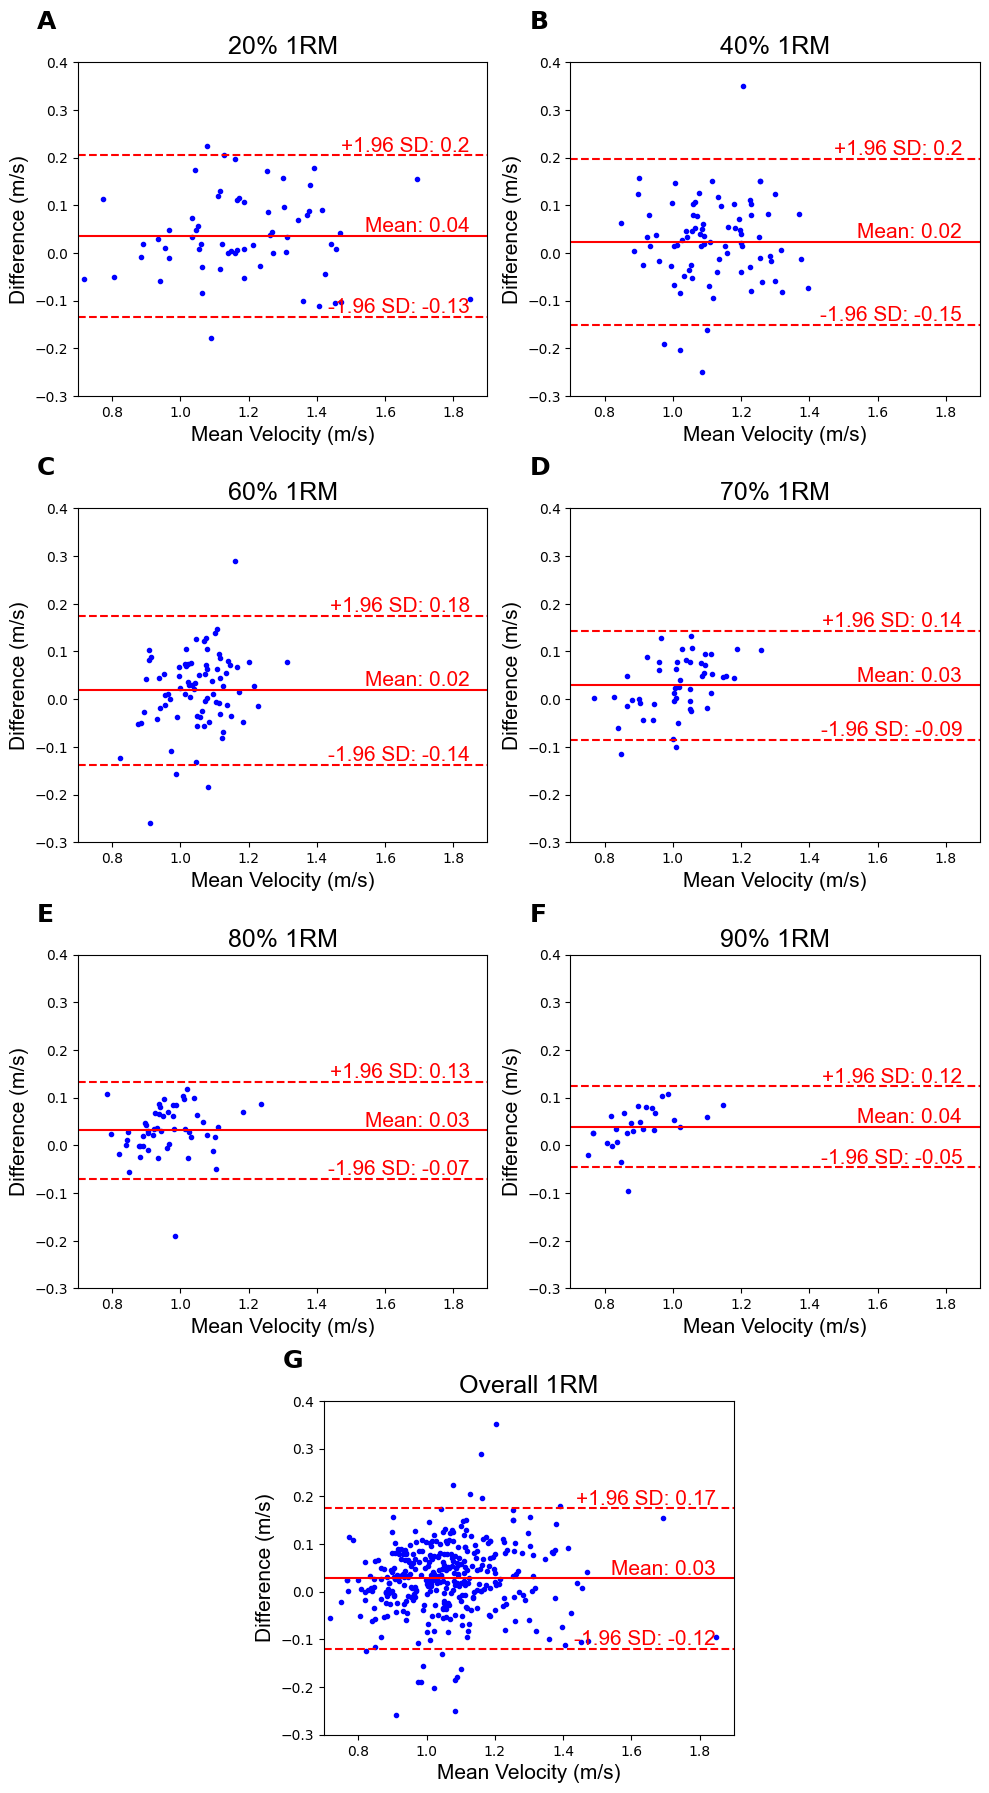

In [21]:
bias_list = []
lower_bound_list = []
upper_bound_list = []

powerclean_mcv_fig = create_blandAltman_plot(powerclean_mean_data_df)
powerclean_blandAltman_mcv_data = put_in_df("Power Clean MCV")
powerclean_blandAltman_mcv_data

### Power clean - Peak concentric velocity

,Percentage RM,Bias,Lower bound,Upper bound,95% LoA,Bias (95% LoA),Condition
0,20%,-0.031513,-0.374055,0.311029,-0.37 - 0.31,-0.03 (-0.37 - 0.31),Power Clean PCV
1,40%,-0.051115,-0.437678,0.335448,-0.44 - 0.34,-0.05 (-0.44 - 0.34),Power Clean PCV
2,60%,-0.103383,-0.445154,0.238388,-0.45 - 0.24,-0.1 (-0.45 - 0.24),Power Clean PCV
3,70%,-0.138593,-0.391343,0.114156,-0.39 - 0.11,-0.14 (-0.39 - 0.11),Power Clean PCV
4,80%,-0.120206,-0.390016,0.149604,-0.39 - 0.15,-0.12 (-0.39 - 0.15),Power Clean PCV
5,90%,-0.172233,-0.364194,0.019729,-0.36 - 0.02,-0.17 (-0.36 - 0.02),Power Clean PCV
6,Overall,-0.091376,-0.425751,0.242999,-0.43 - 0.24,-0.09 (-0.43 - 0.24),Power Clean PCV


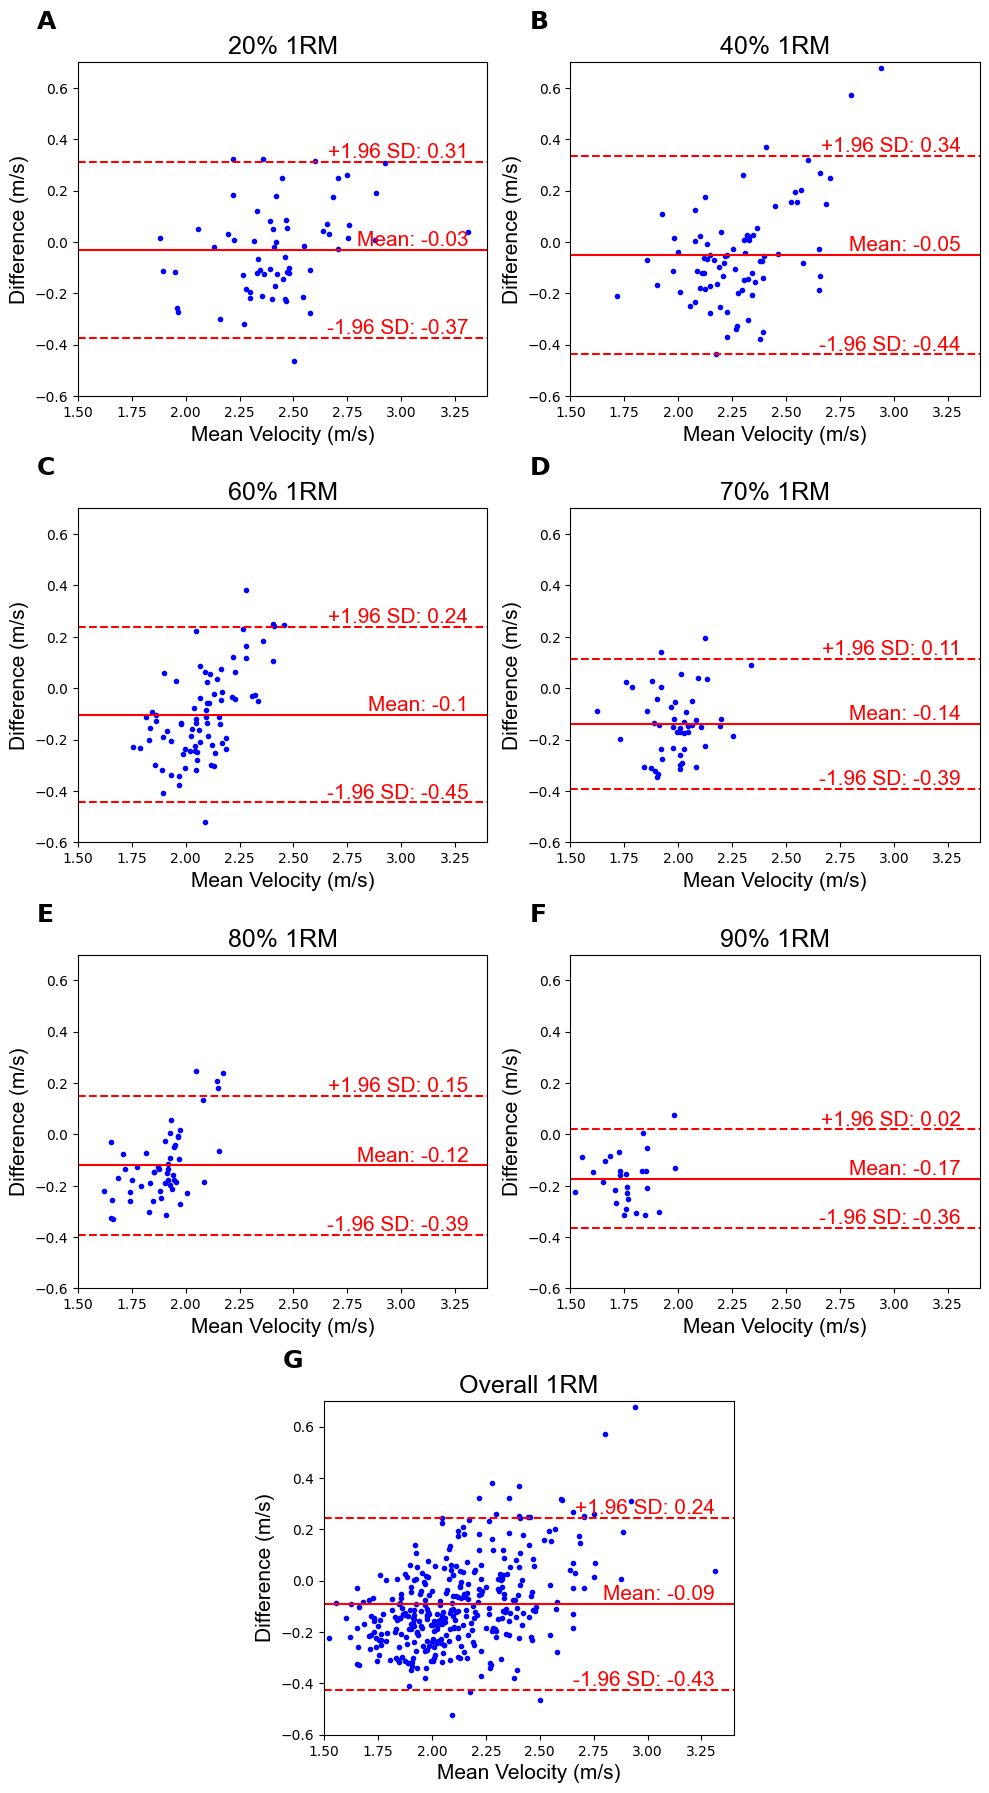

In [22]:
bias_list = []
lower_bound_list = []
upper_bound_list = []

powerclean_pcv_fig = create_blandAltman_plot(powerclean_peak_data_df)
powerclean_blandAltman_pcv_data = put_in_df("Power Clean PCV")
powerclean_blandAltman_pcv_data

### Snatch - Mean concentric velocity

,Percentage RM,Bias,Lower bound,Upper bound,95% LoA,Bias (95% LoA),Condition
0,20%,0.047990,-0.130186,0.226166,-0.13 - 0.23,0.05 (-0.13 - 0.23),Snatch MCV
1,40%,0.050390,-0.146121,0.246900,-0.15 - 0.25,0.05 (-0.15 - 0.25),Snatch MCV
2,60%,0.025285,-0.115716,0.166285,-0.12 - 0.17,0.03 (-0.12 - 0.17),Snatch MCV
3,70%,0.017265,-0.100683,0.135214,-0.1 - 0.14,0.02 (-0.1 - 0.14),Snatch MCV
4,80%,0.026645,-0.120054,0.173344,-0.12 - 0.17,0.03 (-0.12 - 0.17),Snatch MCV
5,90%,0.032997,-0.059695,0.125689,-0.06 - 0.13,0.03 (-0.06 - 0.13),Snatch MCV
6,Overall,0.034742,-0.125279,0.194763,-0.13 - 0.19,0.03 (-0.13 - 0.19),Snatch MCV


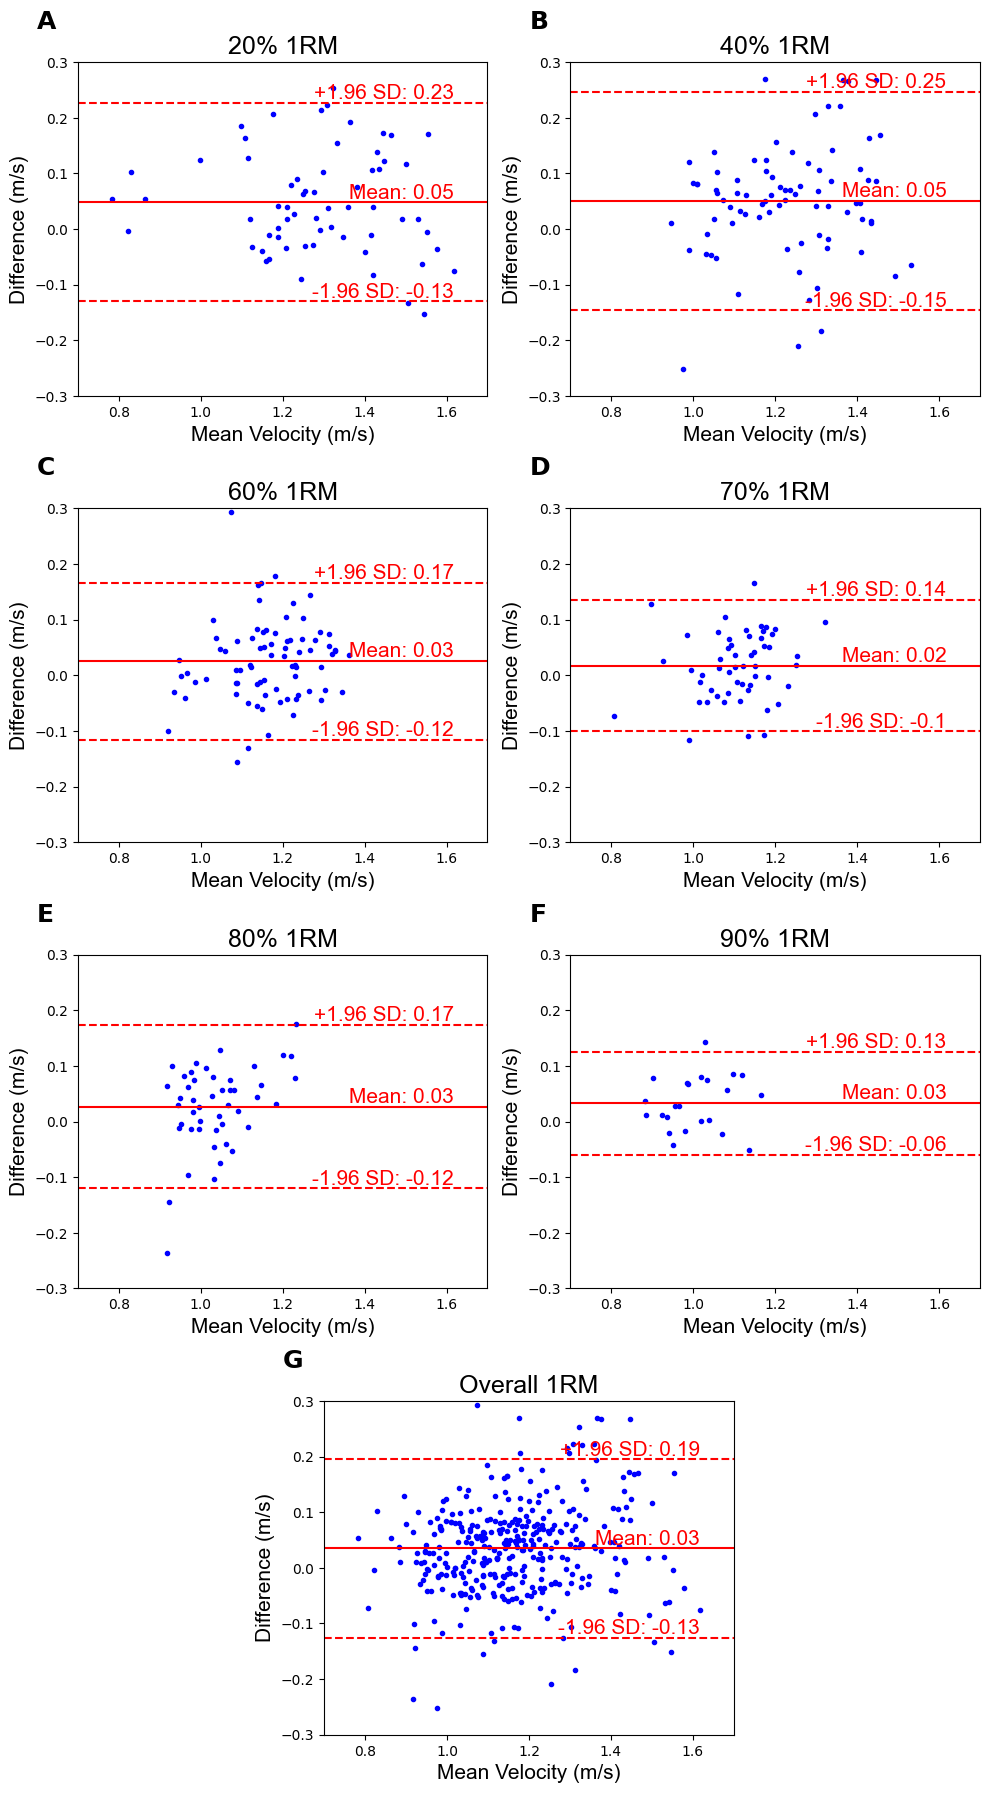

In [23]:
bias_list = []
lower_bound_list = []
upper_bound_list = []

snatch_mcv_fig = create_blandAltman_plot(snatch_mean_data_df)
snatch_blandAltman_mcv_data = put_in_df("Snatch MCV")
snatch_blandAltman_mcv_data

### Snatch - Peak concentric velocity

,Percentage RM,Bias,Lower bound,Upper bound,95% LoA,Bias (95% LoA),Condition
0,20%,-0.088349,-0.390685,0.213988,-0.39 - 0.21,-0.09 (-0.39 - 0.21),Snatch PCV
1,40%,-0.046115,-0.313225,0.220995,-0.31 - 0.22,-0.05 (-0.31 - 0.22),Snatch PCV
2,60%,-0.122198,-0.368279,0.123882,-0.37 - 0.12,-0.12 (-0.37 - 0.12),Snatch PCV
3,70%,-0.168450,-0.368892,0.031992,-0.37 - 0.03,-0.17 (-0.37 - 0.03),Snatch PCV
4,80%,-0.218007,-0.660731,0.224717,-0.66 - 0.22,-0.22 (-0.66 - 0.22),Snatch PCV
5,90%,-0.163808,-0.381583,0.053968,-0.38 - 0.05,-0.16 (-0.38 - 0.05),Snatch PCV
6,Overall,-0.121805,-0.430375,0.186764,-0.43 - 0.19,-0.12 (-0.43 - 0.19),Snatch PCV


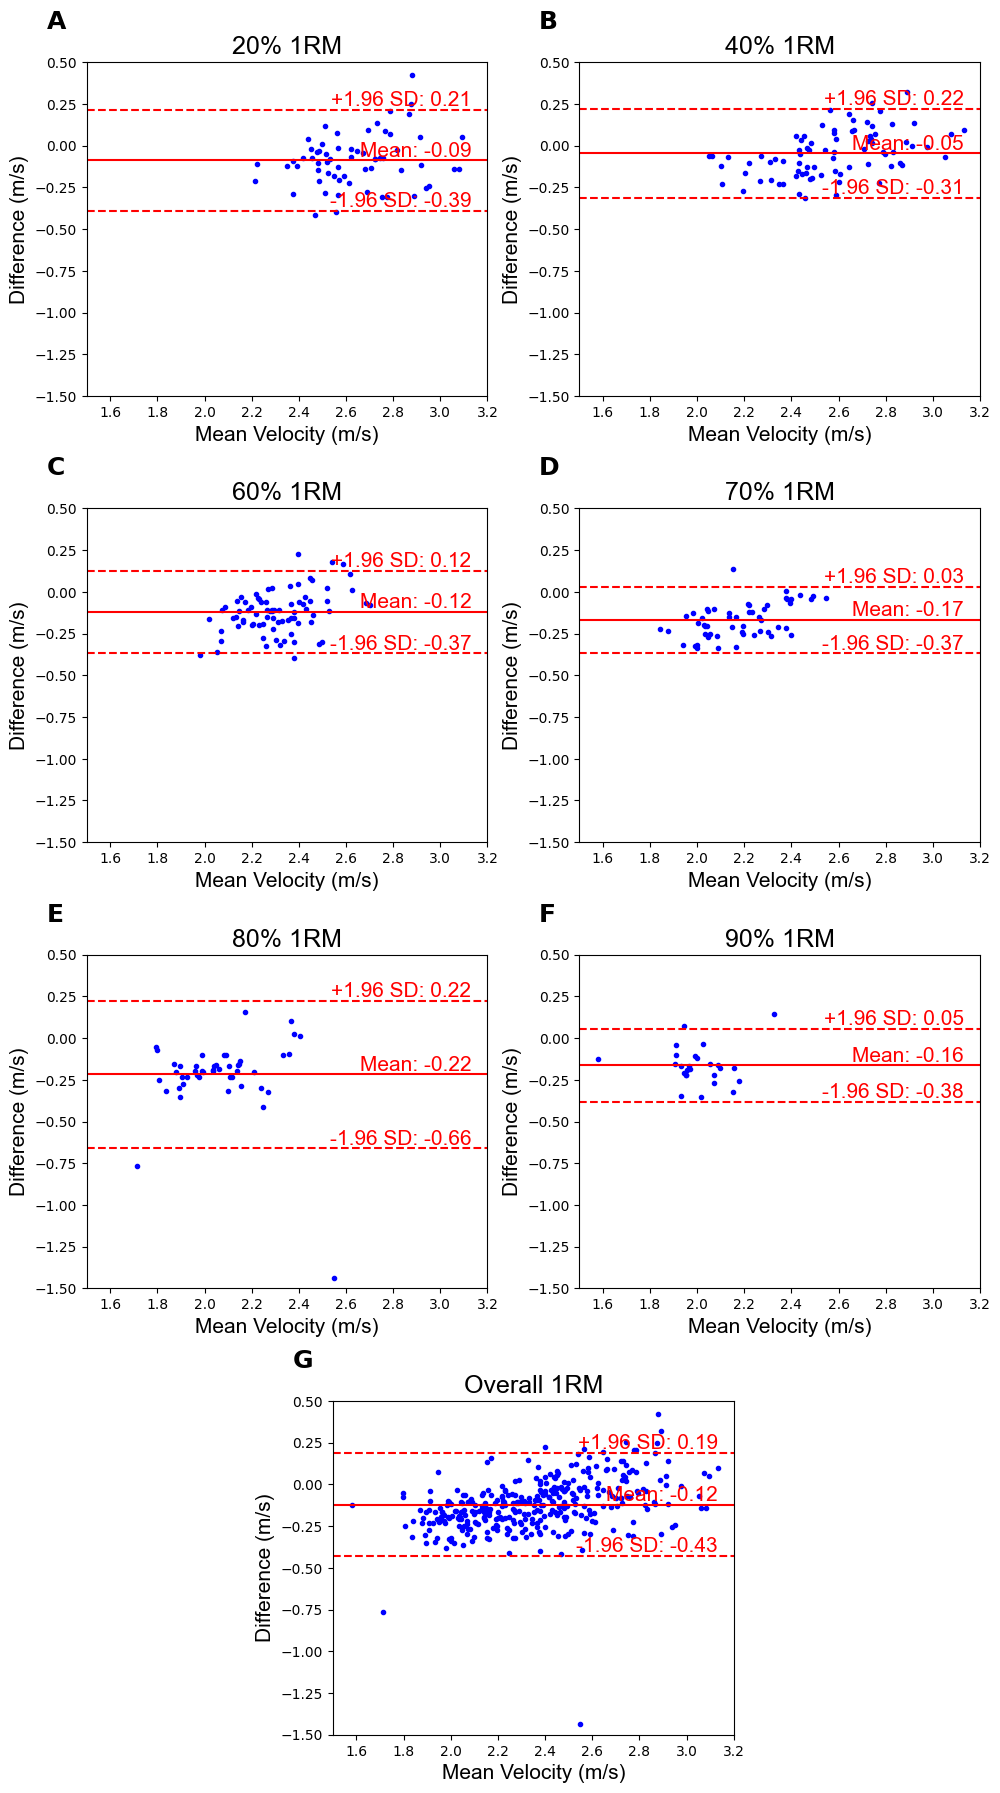

In [24]:
bias_list = []
lower_bound_list = []
upper_bound_list = []

snatch_pcv_fig = create_blandAltman_plot(snatch_peak_data_df)
snatch_blandAltman_pcv_data = put_in_df("Snatch PCV")
snatch_blandAltman_pcv_data

### Combine all dataframes

In [16]:
# Concatenate all blandAltman dataframes
blandAltman_all_data = pd.concat([powerclean_blandAltman_mcv_data, powerclean_blandAltman_pcv_data, 
                             snatch_blandAltman_mcv_data, snatch_blandAltman_pcv_data])
blandAltman_all_data

,Percentage RM,Bias,Lower bound,Upper bound,95% LoA,Bias (95% LoA),Condition
0,20%,0.035410,-0.133658,0.204478,-0.13 - 0.2,0.04 (-0.13 - 0.2),Power Clean MCV
1,40%,0.023625,-0.150518,0.197768,-0.15 - 0.2,0.02 (-0.15 - 0.2),Power Clean MCV
2,60%,0.018688,-0.137890,0.175267,-0.14 - 0.18,0.02 (-0.14 - 0.18),Power Clean MCV
3,70%,0.028642,-0.085407,0.142691,-0.09 - 0.14,0.03 (-0.09 - 0.14),Power Clean MCV
4,80%,0.031637,-0.069750,0.133024,-0.07 - 0.13,0.03 (-0.07 - 0.13),Power Clean MCV
5,90%,0.038810,-0.045906,0.123525,-0.05 - 0.12,0.04 (-0.05 - 0.12),Power Clean MCV
6,Overall,0.027673,-0.119505,0.174851,-0.12 - 0.17,0.03 (-0.12 - 0.17),Power Clean MCV
0,20%,-0.031513,-0.374055,0.311029,-0.37 - 0.31,-0.03 (-0.37 - 0.31),Power Clean PCV
1,40%,-0.051115,-0.437678,0.335448,-0.44 - 0.34,-0.05 (-0.44 - 0.34),Power Clean PCV
2,60%,-0.103383,-0.445154,0.238388,-0.45 - 0.24,-0.1 (-0.45 - 0.24),Power Clean PCV


### Save plots

In [25]:
# Save plots
powerclean_mcv_fig.savefig('PowerClean_MCV.jpg', dpi=300)
powerclean_pcv_fig.savefig('PowerClean_PCV.jpg', dpi=300 )
snatch_mcv_fig.savefig('Snatch_MCV.jpg', dpi=300)
snatch_pcv_fig.savefig('Snatch_PCV.jpg', dpi=300) 

## Getting statistics and values formatted for publication

In [18]:
def format_table(df_rawdata, df_blandAltman):
    flex_mean = []
    flex_std = []
    vicon_mean = []
    vicon_std = []

    # FLEX mean
    for i in range(len(df_rawdata)):
        flex_mean.append(round(statistics.mean(df_rawdata[i]['FLEX']),2))

    # FLEX std
    for i in range(len(df_rawdata)):
        flex_std.append(round(statistics.stdev(df_rawdata[i]['FLEX']),2))

    # VICON mean
    for i in range(len(df_rawdata)):
        vicon_mean.append(round(statistics.mean(df_rawdata[i]['VICON']),2))

    # VICON std
    for i in range(len(df_rawdata)):
        vicon_std.append(round(statistics.stdev(df_rawdata[i]['VICON']),2))

    temp_table = pd.DataFrame({'FLEX (mean)': flex_mean, 'FLEX (std)': flex_std, 'VICON (mean)': vicon_mean, 'VICON (std)': vicon_std})

    final_table = pd.DataFrame()
    # final_table["Intensity"] = df_blandAltman.iloc[:,0]
    final_table["FLEX"] = temp_table["FLEX (mean)"].astype(str) + " (" + temp_table["FLEX (std)"].astype(str) + ")"
    final_table["VICON"] = temp_table["VICON (mean)"].astype(str) + " (" + temp_table["VICON (std)"].astype(str) + ")"
    final_table["Bias (95% LoA)"] = df_blandAltman.iloc[:,5]
    return final_table

In [19]:
powerclean_mean_table = format_table(powerclean_mean_data_df, powerclean_blandAltman_mcv_data)
powerclean_mean_table

,FLEX,VICON,Bias (95% LoA)
0,1.21 (0.21),1.17 (0.21),0.04 (-0.13 - 0.2)
1,1.13 (0.13),1.11 (0.13),0.02 (-0.15 - 0.2)
2,1.06 (0.11),1.04 (0.09),0.02 (-0.14 - 0.18)
3,1.03 (0.12),1.0 (0.09),0.03 (-0.09 - 0.14)
4,0.98 (0.1),0.95 (0.09),0.03 (-0.07 - 0.13)
5,0.92 (0.11),0.88 (0.09),0.04 (-0.05 - 0.12)
6,1.07 (0.16),1.05 (0.16),0.03 (-0.12 - 0.17)


In [20]:
powerclean_peak_table = format_table(powerclean_peak_data_df, powerclean_blandAltman_pcv_data)
powerclean_peak_table

,FLEX,VICON,Bias (95% LoA)
0,2.41 (0.3),2.44 (0.24),-0.03 (-0.37 - 0.31)
1,2.26 (0.29),2.31 (0.19),-0.05 (-0.44 - 0.34)
2,2.03 (0.22),2.13 (0.13),-0.1 (-0.45 - 0.24)
3,1.92 (0.15),2.06 (0.14),-0.14 (-0.39 - 0.11)
4,1.83 (0.19),1.95 (0.11),-0.12 (-0.39 - 0.15)
5,1.68 (0.13),1.85 (0.12),-0.17 (-0.36 - 0.02)
6,2.08 (0.33),2.17 (0.25),-0.09 (-0.43 - 0.24)


In [21]:
snatch_mean_table = format_table(snatch_mean_data_df, snatch_blandAltman_mcv_data)
snatch_mean_table

,FLEX,VICON,Bias (95% LoA)
0,1.31 (0.19),1.26 (0.2),0.05 (-0.13 - 0.23)
1,1.25 (0.16),1.2 (0.15),0.05 (-0.15 - 0.25)
2,1.18 (0.12),1.15 (0.11),0.03 (-0.12 - 0.17)
3,1.12 (0.1),1.1 (0.09),0.02 (-0.1 - 0.14)
4,1.05 (0.11),1.02 (0.08),0.03 (-0.12 - 0.17)
5,1.02 (0.09),0.99 (0.08),0.03 (-0.06 - 0.13)
6,1.18 (0.17),1.15 (0.15),0.03 (-0.13 - 0.19)


In [22]:
snatch_peak_table = format_table(snatch_peak_data_df, snatch_blandAltman_pcv_data)
snatch_peak_table

,FLEX,VICON,Bias (95% LoA)
0,2.6 (0.23),2.68 (0.2),-0.09 (-0.39 - 0.21)
1,2.55 (0.28),2.59 (0.22),-0.05 (-0.31 - 0.22)
2,2.25 (0.19),2.37 (0.14),-0.12 (-0.37 - 0.12)
3,2.1 (0.2),2.27 (0.15),-0.17 (-0.37 - 0.03)
4,1.96 (0.21),2.17 (0.22),-0.22 (-0.66 - 0.22)
5,1.92 (0.15),2.09 (0.14),-0.16 (-0.38 - 0.05)
6,2.29 (0.33),2.41 (0.27),-0.12 (-0.43 - 0.19)


Save to Excel

In [23]:
# Combine each dataframe into one
# Each 3 columns after Intensity column is: PowerClean_MCV, PowerClean_PCV, Snatch_MCV, Snatch_PCV

publication_table = pd.concat([powerclean_mean_table, powerclean_peak_table, snatch_mean_table, snatch_peak_table], axis=1) # Concat by row
publication_table.insert(0, 'Intensity', snatch_blandAltman_pcv_data.iloc[:,0]) # Insert to first column 
publication_table.to_excel("DescStats_Table.xlsx") # Save to Excel
publication_table # Show table

,Intensity,FLEX,VICON,Bias (95% LoA),FLEX,VICON,Bias (95% LoA),FLEX,VICON,Bias (95% LoA),FLEX,VICON,Bias (95% LoA)
0,20%,1.21 (0.21),1.17 (0.21),0.04 (-0.13 - 0.2),2.41 (0.3),2.44 (0.24),-0.03 (-0.37 - 0.31),1.31 (0.19),1.26 (0.2),0.05 (-0.13 - 0.23),2.6 (0.23),2.68 (0.2),-0.09 (-0.39 - 0.21)
1,40%,1.13 (0.13),1.11 (0.13),0.02 (-0.15 - 0.2),2.26 (0.29),2.31 (0.19),-0.05 (-0.44 - 0.34),1.25 (0.16),1.2 (0.15),0.05 (-0.15 - 0.25),2.55 (0.28),2.59 (0.22),-0.05 (-0.31 - 0.22)
2,60%,1.06 (0.11),1.04 (0.09),0.02 (-0.14 - 0.18),2.03 (0.22),2.13 (0.13),-0.1 (-0.45 - 0.24),1.18 (0.12),1.15 (0.11),0.03 (-0.12 - 0.17),2.25 (0.19),2.37 (0.14),-0.12 (-0.37 - 0.12)
3,70%,1.03 (0.12),1.0 (0.09),0.03 (-0.09 - 0.14),1.92 (0.15),2.06 (0.14),-0.14 (-0.39 - 0.11),1.12 (0.1),1.1 (0.09),0.02 (-0.1 - 0.14),2.1 (0.2),2.27 (0.15),-0.17 (-0.37 - 0.03)
4,80%,0.98 (0.1),0.95 (0.09),0.03 (-0.07 - 0.13),1.83 (0.19),1.95 (0.11),-0.12 (-0.39 - 0.15),1.05 (0.11),1.02 (0.08),0.03 (-0.12 - 0.17),1.96 (0.21),2.17 (0.22),-0.22 (-0.66 - 0.22)
5,90%,0.92 (0.11),0.88 (0.09),0.04 (-0.05 - 0.12),1.68 (0.13),1.85 (0.12),-0.17 (-0.36 - 0.02),1.02 (0.09),0.99 (0.08),0.03 (-0.06 - 0.13),1.92 (0.15),2.09 (0.14),-0.16 (-0.38 - 0.05)
6,Overall,1.07 (0.16),1.05 (0.16),0.03 (-0.12 - 0.17),2.08 (0.33),2.17 (0.25),-0.09 (-0.43 - 0.24),1.18 (0.17),1.15 (0.15),0.03 (-0.13 - 0.19),2.29 (0.33),2.41 (0.27),-0.12 (-0.43 - 0.19)
